In [19]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.ticker as tck

In [20]:
static = pd.read_csv("chunksize_100.csv", header=0)
chunks = [1, 2, 4, 8, 12, 16, 20, 24]
execution_time = static["execution_time_(s)"]

In [21]:
# threads_plot = []
s100_execution_time_avg = []
s100_error = []
s100_speed_up = []
s100_efficiency = []

T_1 = (execution_time[0] + execution_time[1] + execution_time[2]) / 3
error = (max([execution_time[0], execution_time[1], execution_time[2]]) - min([execution_time[0], execution_time[1], execution_time[2]])) / 4
s100_execution_time_avg.append(T_1)
s100_error.append(error)
s100_efficiency.append(1)
# threads_plot.append(2)
s100_speed_up.append(2)

for i, chunk in zip(range(3, len(execution_time), 3), chunks):
    avg = (execution_time[i] + execution_time[i+1] + execution_time[i+2]) / 3
    s100_execution_time_avg.append(avg)
    S_p = T_1 / avg
    s100_speed_up.append(S_p)
    Eff_p = S_p / chunk
    s100_efficiency.append(Eff_p)
    
    error = np.std([execution_time[i], execution_time[i+1], execution_time[i+2]]) / np.sqrt(3)
    s100_error.append(error)


In [22]:
static = pd.read_csv("chunksize_500.csv", header=0)
chunks = [1, 2, 4, 8, 12, 16, 20, 24]
execution_time = static["execution_time_(s)"]

In [23]:
# threads_plot = []
s500_execution_time_avg = []
s500_error = []
s500_speed_up = []
s500_efficiency = []

T_1 = (execution_time[0] + execution_time[1] + execution_time[2]) / 3
error = (max([execution_time[0], execution_time[1], execution_time[2]]) - min([execution_time[0], execution_time[1], execution_time[2]])) / 4
s500_execution_time_avg.append(T_1)
s500_error.append(error)
s500_efficiency.append(1)
# threads_plot.append(2)
s500_speed_up.append(2)

for i, chunk in zip(range(3, len(execution_time), 3), chunks):
    avg = (execution_time[i] + execution_time[i+1] + execution_time[i+2]) / 3
    s500_execution_time_avg.append(avg)
    S_p = T_1 / avg
    s500_speed_up.append(S_p)
    Eff_p = S_p / chunk
    s500_efficiency.append(Eff_p)
    
    error = np.std([execution_time[i], execution_time[i+1], execution_time[i+2]]) / np.sqrt(3)
    s500_error.append(error)


C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.canvas.print_figure(bytes_io, **kw)


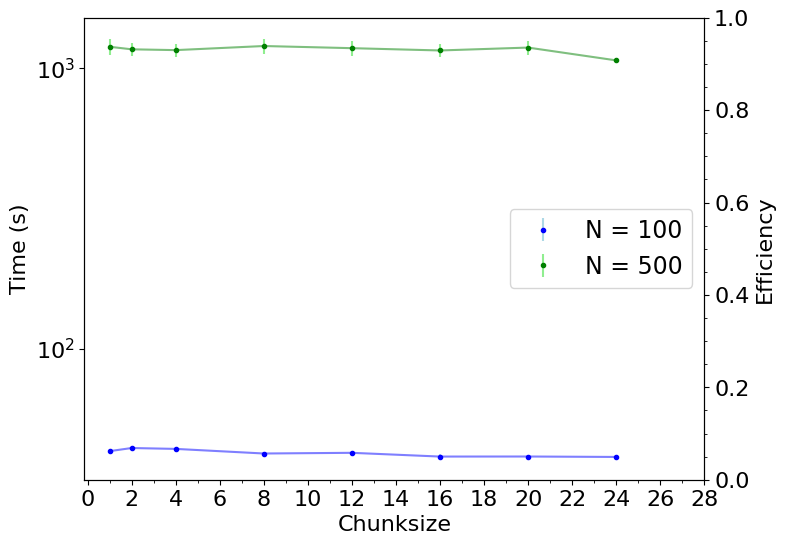

In [27]:
xticks = [x for x in range(0, 30, 2)]


fig, ax = plt.subplots(1,figsize=(8,6))

#plt.errorbar(threads_plot, guided_efficiency, guided_error, fmt='.', color='Black', ecolor='LightGrey')
ax.errorbar(chunks, s500_execution_time_avg, s500_error, fmt=".",label="N = 500", color="blue", ecolor="lightblue")
plt.plot(chunks, s500_execution_time_avg, color="blue", alpha=0.5)

ax.errorbar(chunks, s100_execution_time_avg, s100_error, fmt=".",label="N = 100", color="green", ecolor="lightgreen")
plt.plot(chunks, s100_execution_time_avg, color="green", alpha=0.5)




plt.xticks(xticks, xticks)

plt.xlabel("Chunksize", size=16)
plt.ylabel("Time (s)", size=16)

ax.set_yscale('log',base=10) 

ax2=ax.twinx()

ax2.plot(chunk, s500_efficiency, color="blue", linestyle="--")
ax2.plot(chunk, s100_efficiency, color="green", linestyle="--")


ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)

ax.xaxis.set_minor_locator(tck.AutoMinorLocator(2))
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())

ax2.set_ylabel("Efficiency", size=16)
ax2.yaxis.set_tick_params(labelsize=16)

ax2.yaxis.set_minor_locator(tck.AutoMinorLocator())

ax.legend(prop={'size': 17})
plt.show()